In [37]:
# @title Reading both files
import pandas as pd
sleep = pd.read_csv('https://raw.githubusercontent.com/jaygodara45/Sleep-and-Steps/main/sleep.csv')
steps = pd.read_csv('https://raw.githubusercontent.com/jaygodara45/Sleep-and-Steps/main/steps.csv')

In [21]:
sleep.head()

,Timestamp,Minutes Asleep,Sleep Type
0,2022-05-25T00:00:00.000,31,light
1,2022-05-25T00:31:00.000,16,rem
2,2022-05-25T00:47:00.000,19,light
3,2022-05-25T01:06:00.000,22,deep
4,2022-05-25T01:28:00.000,25,light


In [22]:
# @title Parsing datetime column for sleep
sleep['Timestamp'] = pd.to_datetime(sleep['Timestamp'])
sleep.head()

,Timestamp,Minutes Asleep,Sleep Type
0,2022-05-25 00:00:00,31,light
1,2022-05-25 00:31:00,16,rem
2,2022-05-25 00:47:00,19,light
3,2022-05-25 01:06:00,22,deep
4,2022-05-25 01:28:00,25,light


In [23]:
steps.head()

,datetime,steps
0,25/05/22 0:00,NaN
1,25/05/22 0:01,NaN
2,25/05/22 0:02,0.0
3,25/05/22 0:03,0.0
4,25/05/22 0:04,0.0


In [24]:
# @title Parsing datetime column for steps
steps['datetime'] = pd.to_datetime(steps['datetime'])
steps.head()

<ipython-input-24-1fa2d756b9e3>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,datetime,steps
0,2022-05-25 00:00:00,NaN
1,2022-05-25 00:01:00,NaN
2,2022-05-25 00:02:00,0.0
3,2022-05-25 00:03:00,0.0
4,2022-05-25 00:04:00,0.0


In [25]:
# @title Replacing NaN values in the steps column with 0
steps['steps'] = steps['steps'].fillna(0)
steps

,datetime,steps
0,2022-05-25 00:00:00,0.0
1,2022-05-25 00:01:00,0.0
2,2022-05-25 00:02:00,0.0
3,2022-05-25 00:03:00,0.0
4,2022-05-25 00:04:00,0.0
...,...,...
1435,2022-05-25 23:55:00,0.0
1436,2022-05-25 23:56:00,0.0
1437,2022-05-25 23:57:00,0.0
1438,2022-05-25 23:58:00,0.0


In [40]:
# @title Plotting count of steps
import plotly.express as px
df = steps

fig = px.line(df.reset_index(), x='datetime', y='steps')

fig.update_xaxes(
    rangeslider_visible = True
)

fig.show()

In [36]:
# @title Total steps in a day
total_steps_in_day = 0
for i in range(len(steps)):
  total_steps_in_day += steps.iloc[i]['steps']
total_steps_in_day

2790.0

In [41]:
sleep['Prefix Sum'] = sleep['Minutes Asleep'].cumsum()
sleep

,Timestamp,Minutes Asleep,Sleep Type,Prefix Sum
0,2022-05-25T00:00:00.000,31,light,31
1,2022-05-25T00:31:00.000,16,rem,47
2,2022-05-25T00:47:00.000,19,light,66
3,2022-05-25T01:06:00.000,22,deep,88
4,2022-05-25T01:28:00.000,25,light,113
5,2022-05-25T01:53:00.000,4,wake,117
6,2022-05-25T01:57:00.000,13,light,130
7,2022-05-25T02:10:30.000,11,wake,141
8,2022-05-25T02:22:00.000,2,light,143
9,2022-05-25T02:24:00.000,14,wake,157


In [42]:
for i in range(len(sleep)):
    if i == 0:
        start_index = 0
    else:
        start_index = sleep.iloc[i-1]['Prefix Sum']

    end_index = sleep.iloc[i]['Prefix Sum']

    steps_sum = steps.iloc[start_index:end_index]['steps'].sum()

    sleep.at[i, 'steps_count'] = steps_sum

In [43]:
wake_cnt = 0
light_cnt = 0
deep_cnt = 0
rem_cnt = 0
l = [0, 0, 0, 0]
for i in range(len(sleep)):
    if sleep.loc[i, 'Sleep Type'] == 'wake' and sleep.loc[i, 'steps_count'] > 0:
        wake_cnt += 1
        l[0] += 1
    if sleep.loc[i, 'Sleep Type'] == 'light' and sleep.loc[i, 'steps_count'] > 0:
        light_cnt += 1
        l[1] += 1
    if sleep.loc[i, 'Sleep Type'] == 'deep' and sleep.loc[i, 'steps_count'] > 0:
        deep_cnt += 1
        l[3] += 1
    if sleep.loc[i, 'Sleep Type'] == 'rem' and sleep.loc[i, 'steps_count'] > 0:
        rem_cnt += 1
        l[2] += 1


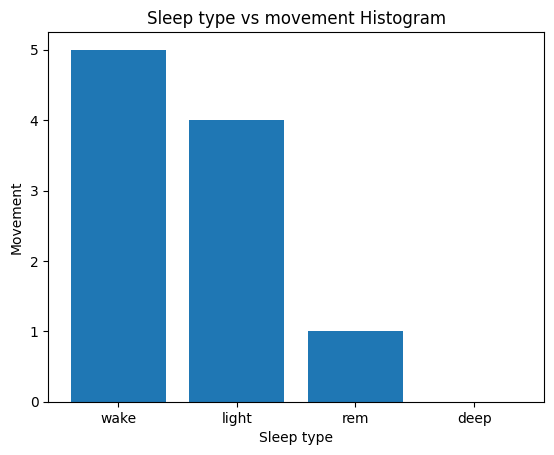

In [47]:
# @title Plotting number of times the person moved in every sleep type
import matplotlib.pyplot as plt
indices = range(len(l))
plt.bar(indices, l)

sleep_type = ['wake', 'light', 'rem', 'deep']
plt.xticks(indices, sleep_type)
plt.xlabel('Sleep type')
plt.ylabel('Movement')
plt.title('Sleep type vs movement Histogram')


plt.show()